In [2]:
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

In [3]:
drug_data = pd.read_pickle("drug_related.pkl")
selecteddata = drug_data[['dispatch_response_seconds_qy',
                          'incident_response_seconds_qy', 'incident_travel_tm_seconds_qy', 'borough']].copy()
selecteddata.dropna(axis=0, inplace=True)
# zipcodelabels = selecteddata['zipcode']
# selecteddata.drop('zipcode', axis=1, inplace=True)


In [8]:
bors = {"MANHATTAN": 13,"BRONX": 30,"BROOKLYN": 31,"QUEENS": 18,"RICHMOND / STATEN ISLAND": 10}

In [10]:
selecteddata = selecteddata[selecteddata.borough != "UNKNOWN"]

In [11]:
selecteddata["percent_black"] = selecteddata.apply(
    lambda row: bors[row["borough"]], axis=1)

C:\Users\vogeld2\AppData\Local\Temp\ipykernel_19772\397213671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecteddata["percent_black"] = selecteddata.apply(


In [13]:
selecteddata.drop('borough', axis=1, inplace=True)

C:\Users\vogeld2\AppData\Local\Temp\ipykernel_19772\2632608515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecteddata.drop('borough', axis=1, inplace=True)


In [14]:
from sklearn import linear_model

In [18]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(selecteddata["percent_black"].values.reshape(-1,1), selecteddata['dispatch_response_seconds_qy'].values)


Lasso(alpha=0.1)

In [20]:
print(clf.coef_)
print(clf.intercept_)

[-0.88338431]
98.10066362703535


In [21]:
rdg = Ridge(alpha=1.0)
rdg.fit(selecteddata["percent_black"].values.reshape(-1, 1),
        selecteddata['dispatch_response_seconds_qy'].values)


Ridge()

In [22]:
print(rdg.coef_)
print(rdg.intercept_)

[-0.8848535]
98.13223759753764


In [23]:
import matplotlib.pyplot as plt

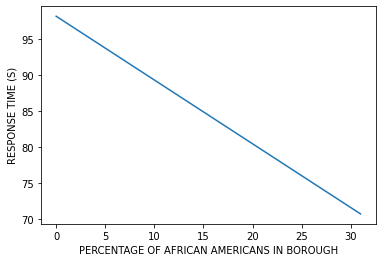

In [27]:
x=np.linspace(0,31,500)
plt.plot(x,rdg.coef_[0]*x+rdg.intercept_)
plt.xlabel("PERCENTAGE OF AFRICAN AMERICANS IN BOROUGH")
plt.ylabel("RESPONSE TIME (S)")
plt.show()